## **Trabajo Práctico n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: **Matias**
- Apellido: **Intraguglielmo**
- Legajo: **164.683-7**

En este trabajo práctico se aplicarán algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

In [1]:
# Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importo el dataset para su posterior analisis
diabetes_df = pd.read_csv('dataset_diabetes.csv')

# Verifico que se haya cargado correctamente, imprimiendo las primeras filas del dataframe
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Imprimo las dimensiones del dataset con .shape el cual me permite ver su tamaño en cuanto a filas y columnas.
diabetes_df.shape

(768, 9)

In [4]:
# Observo el tipo de dato y la cantidad de registros nulos, para cada una de nuestras variables:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### **- Distribucion de la variable Outcome que me mostrará quienes tienen diabetes, y quienes no.**

<Figure size 800x600 with 0 Axes>

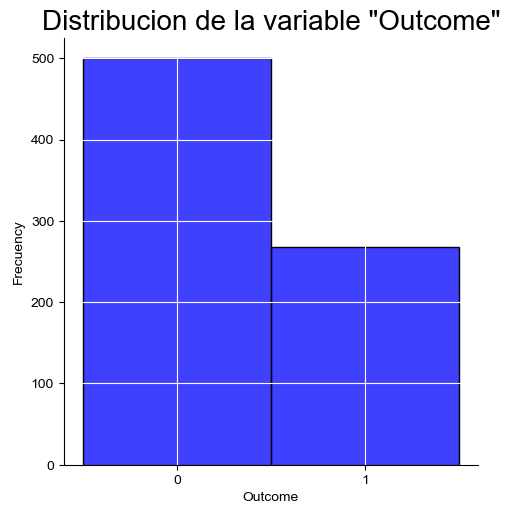

In [5]:
plt.figure(figsize=(8,6))
ax = sns.displot(diabetes_df.Outcome, color="blue", bins=2, binwidth=0.2, discrete=True)
ax.set(xticks=[0,1], xticklabels=['0', '1'])
plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = '#d9f5fc'
plt.grid(color='white',linestyle='solid')
plt.xlabel("Outcome")
plt.ylabel("Frecuency")
plt.title('Distribucion de la variable "Outcome"',size = 20)
plt.show()

In [6]:
# Visualizo algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros.
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **- Imprimo un pairplot del dataframe en función de la variable "Outcome"**

Text(0.5, 1.1, 'Pairplot')

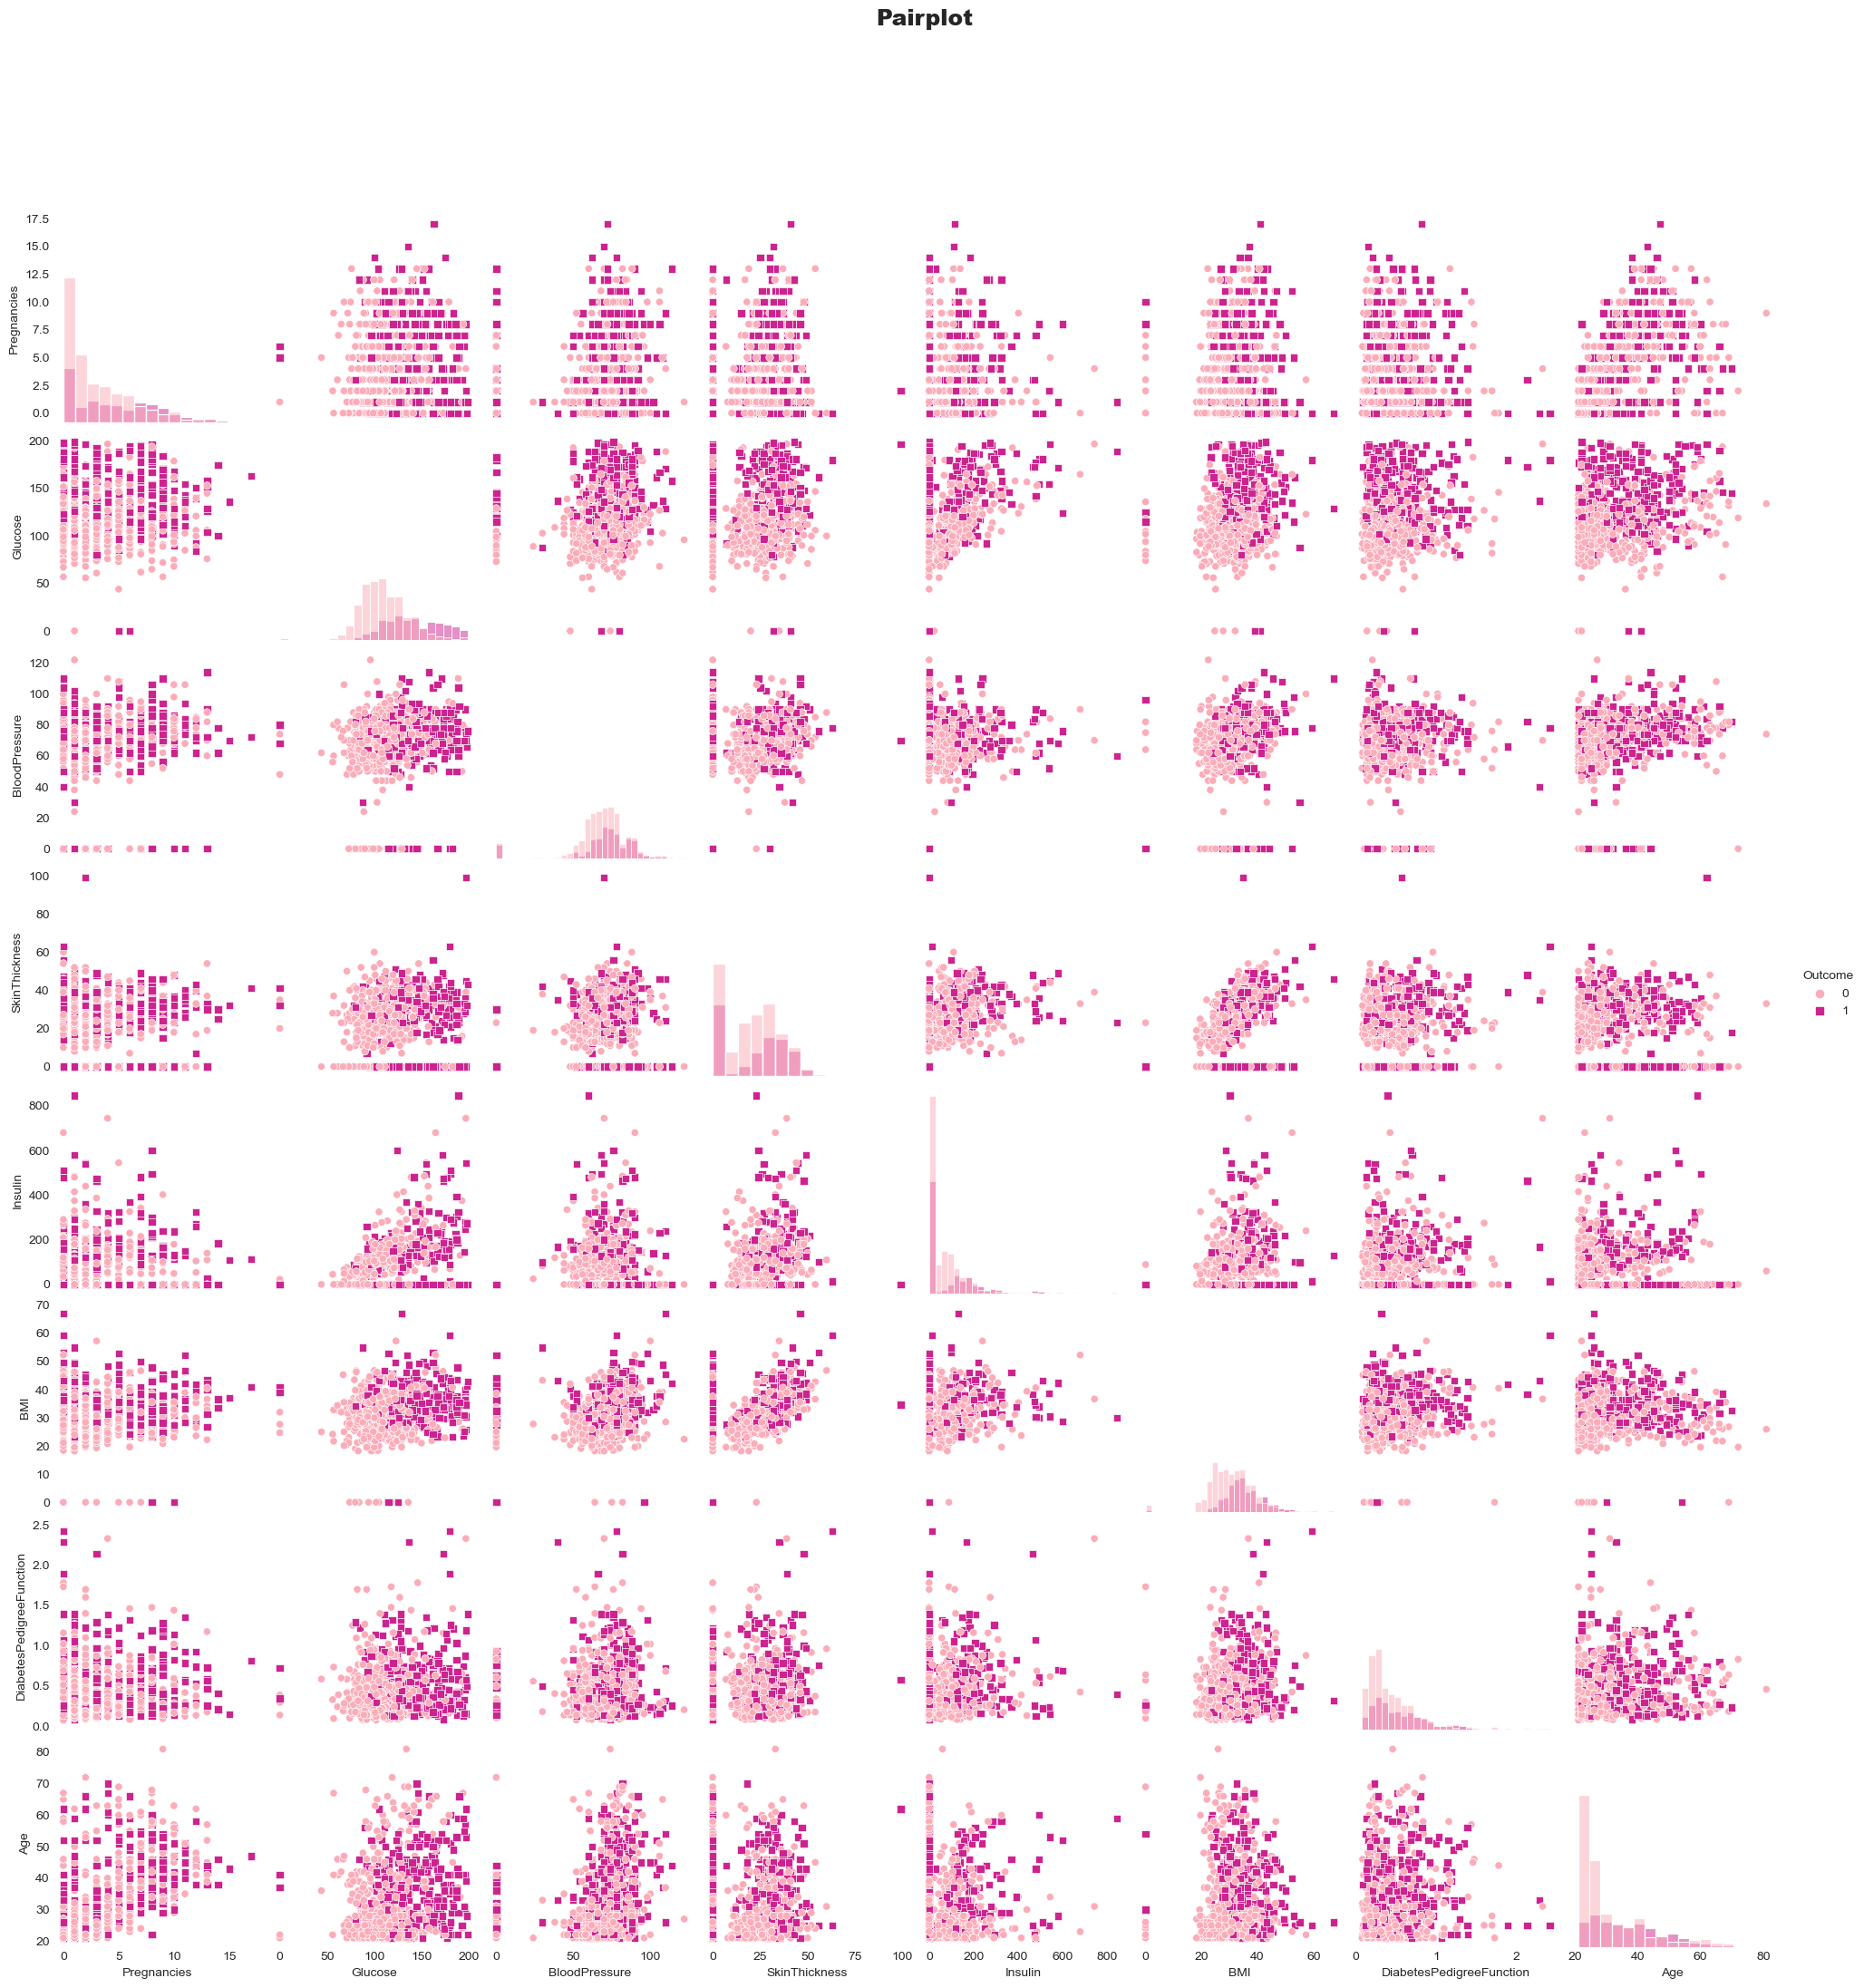

In [7]:
# Seteo de Tema
sns.set_style('white')
vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creo el pairplot
pairplot=sns.pairplot(diabetes_df, hue='Outcome', diag_kind='hist', palette='RdPu', markers=['o','s'], 
                        vars=vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y=1.1, fontsize='18', 
                      fontfamily='sans-serif')

• Como primer conclusion a partir del pairplot, podemos decir que para muchas de las variables se observan outliers que registran como valor 0, lo cual podria indicar que no se analizo dicho reactivo.**

• Otra conclusion es que la variable mas determinante a la hora de ver si un paciente es diabetico o no, es la glucosa. Un nivel alto de glucosa indica en la mayoria de los casos que el paciente es diabetico.**

##### **- Analisis de la correlacion lineal de las variables**

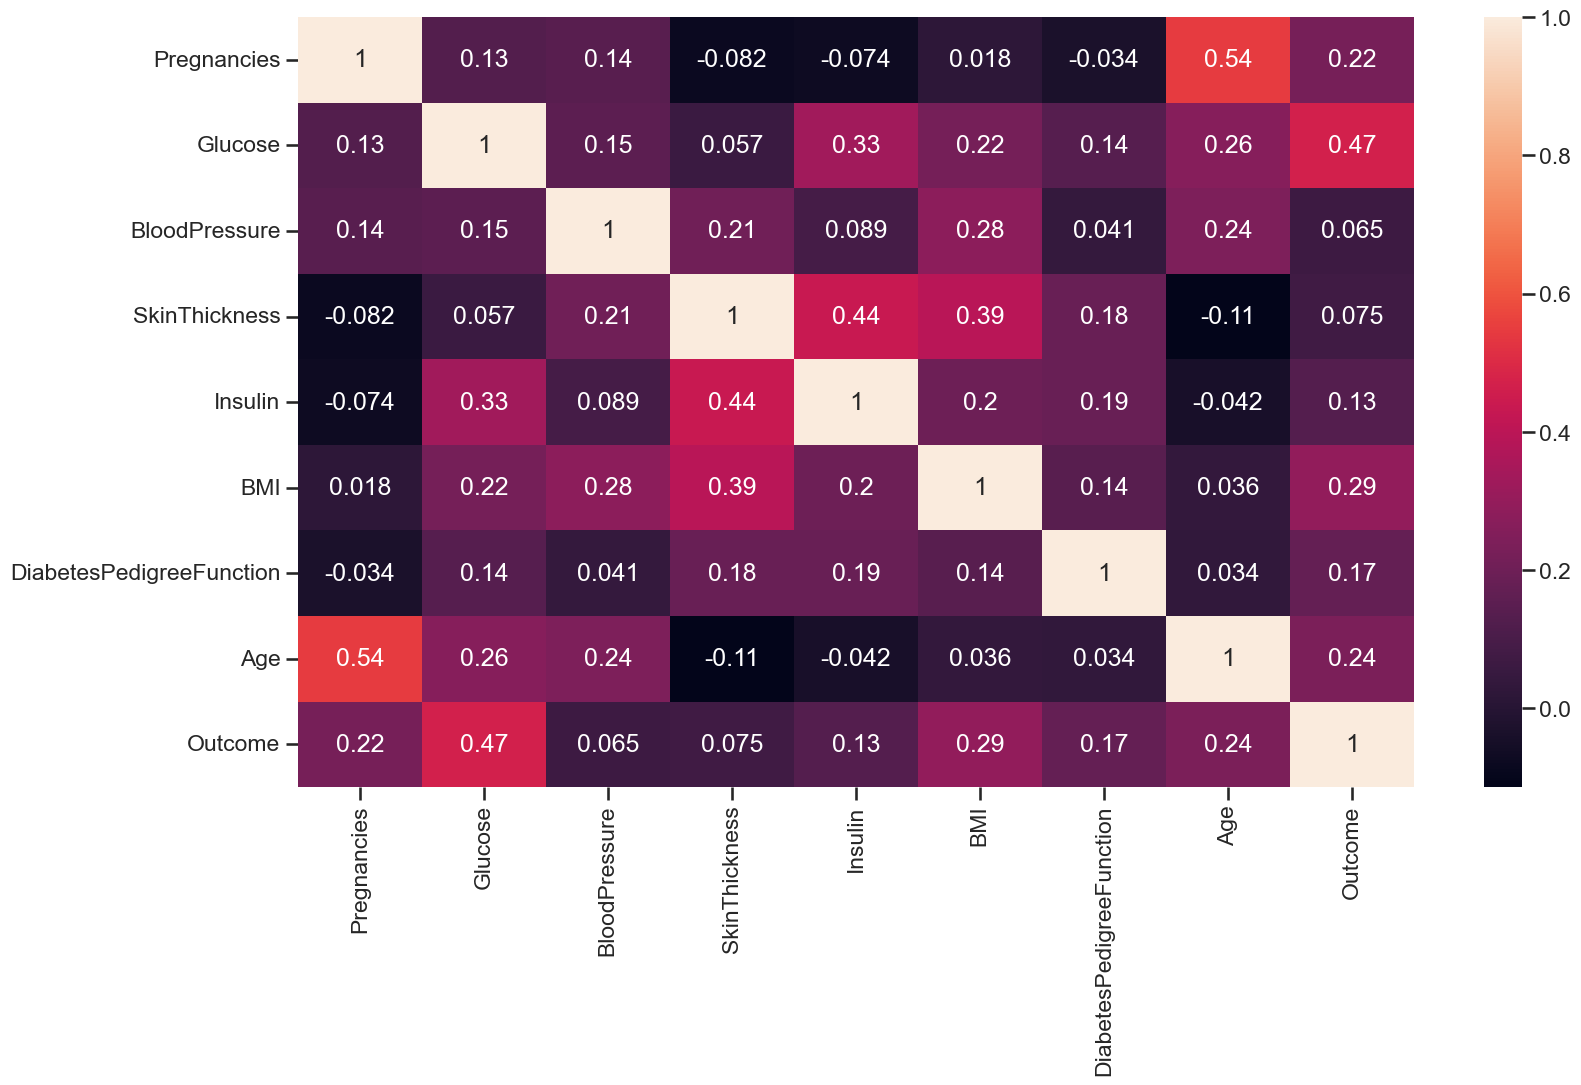

In [9]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(diabetes_df.corr(),annot=True)
sns.set(rc={'figure.figsize':(16,10)})
plt.show()


• El par que cuenta con una correlacion fuerte (positiva) es el de Embarazos y Edad.

##### **- Histograma de la variable BMI**

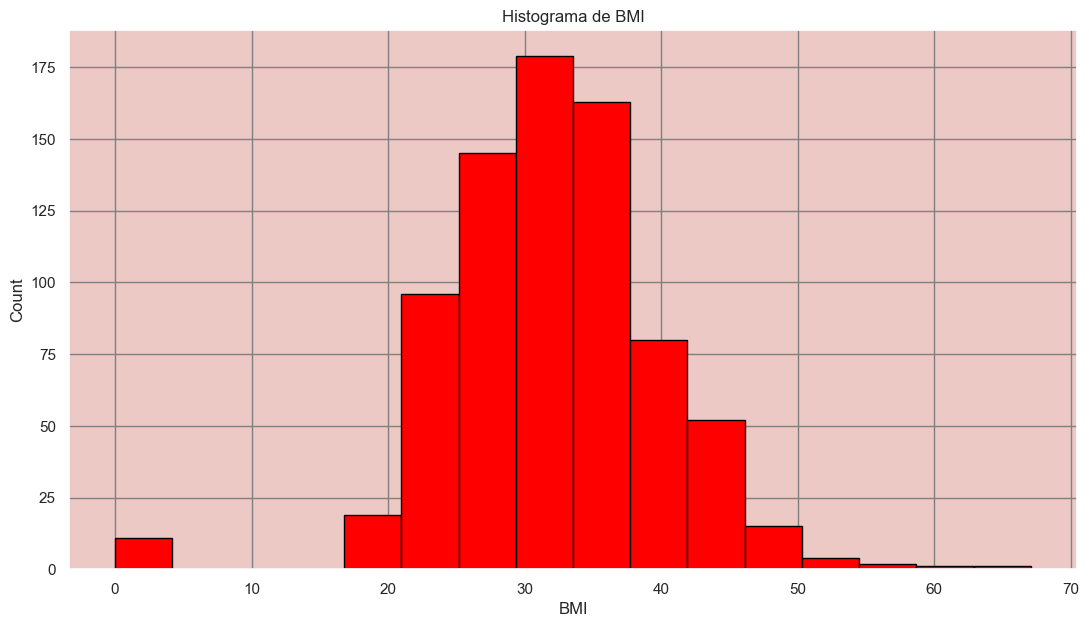

In [12]:
plt.figure(figsize=(13,7))
plt.style.use('seaborn-deep')
plt.rcParams['axes.facecolor'] = '#edc9c5'
plt.grid(color='gray',linestyle='solid')
plt.title(f'Histograma de BMI')
plt.ylabel('Count')
plt.xlabel('BMI')
plt.hist(diabetes_df.BMI,bins=16,density=False,edgecolor='black',color='red')
plt.show()

##### **- Boxplot de la variable BMI**

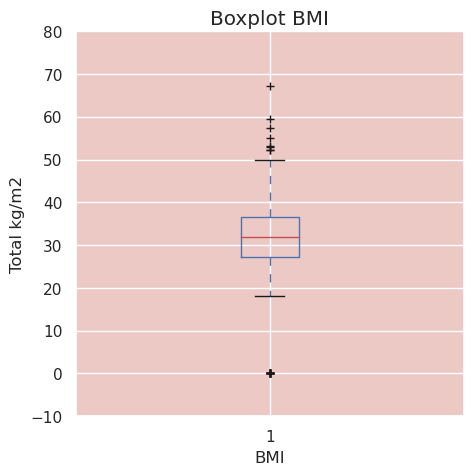

In [13]:
plt.subplots(figsize=(5,5))
plt.style.use('classic')
plt.rcParams['axes.facecolor'] = '#e1e9eb'
plt.grid(color='white',linestyle='solid')
plt.boxplot(diabetes_df['BMI'])
plt.title('Boxplot BMI')
plt.ylabel('Total kg/m2')
plt.xlabel("BMI")
plt.show()

• Notamos que hay pacientes con registros nulos para la variable BMI. Posiblemente sean pacientes a los que no se les hizo el calculo del indice de masa corporal. 

##### **- Filtro el dataset para eliminar los valores que consideremos atípicos de la variable BMI**

In [14]:
# Filtro el df por variable BMI
list_vars = ["BMI"]
diabetes_df[list_vars].head(50)

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
5,25.6
6,31.0
7,35.3
8,30.5
9,0.0


In [15]:
# Elimino los registros con valor 0 en la variable BMI.
diabetes_BMI= diabetes_df.loc[diabetes_df['BMI']!=0]
diabetes_BMI[list_vars].head(50)

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
5,25.6
6,31.0
7,35.3
8,30.5
10,37.6


##### **- Boxplot de la distribucion de la "Glucosa" segun si el paciente es positivo o negativo de Diabetes (variable "Outcome")**

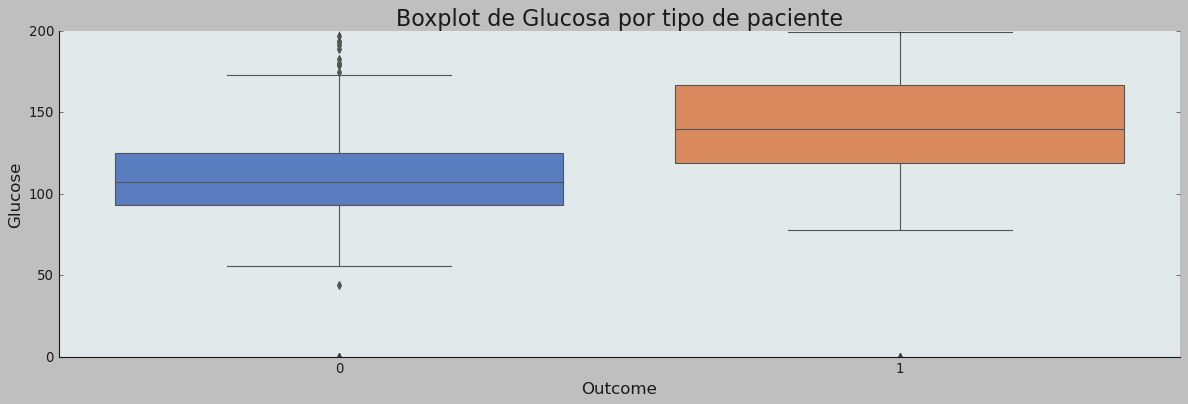

In [16]:
g = sns.catplot(data=diabetes_df,
                x="Outcome",y="Glucose", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Outcome",size = 15)
plt.ylabel("Glucose",size = 15)
plt.title('Boxplot de Glucosa por tipo de paciente',size = 20)
plt.show()


• Se observa mediante el siguiente grafico, que los pacientes diabeticos tienen un nivel de glucosa mayor.

##### **- Scatterplot para observar como se distribuye la Glucosa y la Presion Sanguinea segun el tipo de paciente**

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

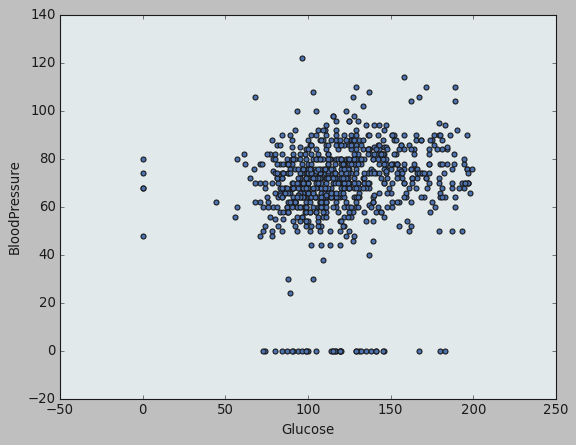

In [17]:
diabetes_df.plot(kind="scatter", x="Glucose", y="BloodPressure")

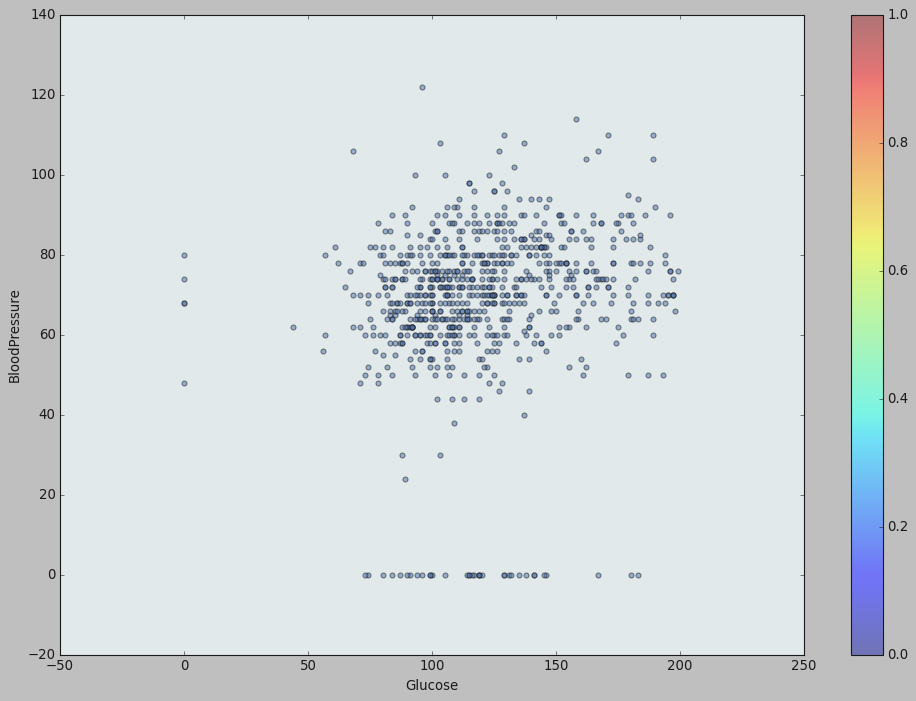

In [18]:
#Podemos aplicar tambien algunas funciones de plot sobre el dataframe usando pd.plot( )
diabetes_df.plot(kind="scatter", x="Glucose", y="BloodPressure",
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(15,10))
plt.show()

##### **- Creo una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:**
- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [19]:
# Defino los limites para cada una de las categorias, y creo la columna "Rango Etario"

diabetes_df.loc[(diabetes_df['Age'] > 0) & (diabetes_df['Age'] <= 30), 'RangoEtario'] = 'Menor a 30'
diabetes_df.loc[(diabetes_df['Age'] > 30) & (diabetes_df['Age'] <= 40), 'RangoEtario']   = 'Entre 30 y 40'
diabetes_df.loc[(diabetes_df['Age'] > 40) & (diabetes_df['Age'] <= 100), 'RangoEtario']   = 'Mayor a 40'

In [20]:
# Chequeo si se creo correctamente la nueva columna
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RangoEtario
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40
5,5,116,74,0,0,25.6,0.201,30,0,Menor a 30
6,3,78,50,32,88,31.0,0.248,26,1,Menor a 30
7,10,115,0,0,0,35.3,0.134,29,0,Menor a 30
8,2,197,70,45,543,30.5,0.158,53,1,Mayor a 40
9,8,125,96,0,0,0.0,0.232,54,1,Mayor a 40


##### **- Countplot para observar la cantidad de pacientes diabéticos y no diabéticos por rango etario.**

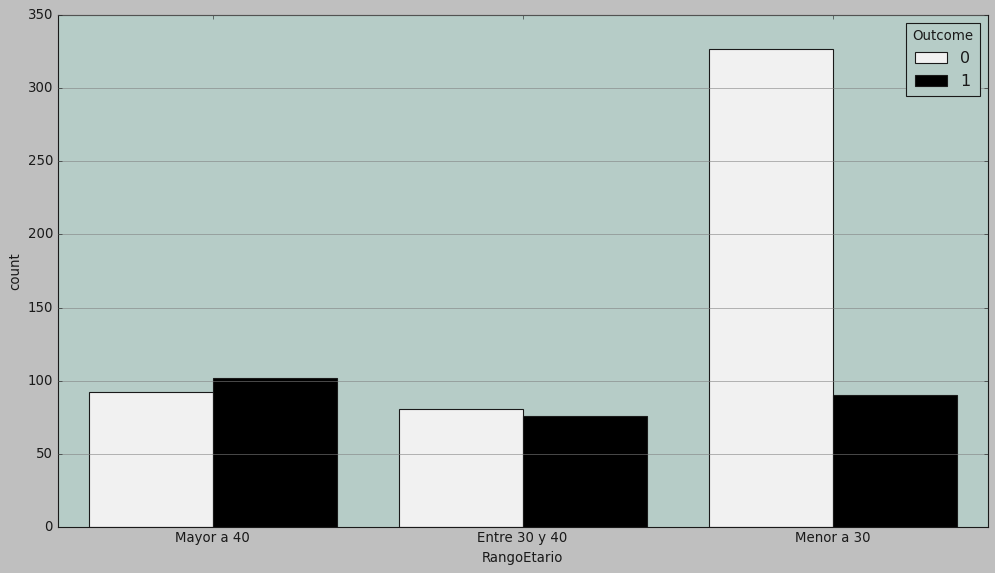

In [23]:
plt.figure(figsize=(15,8))
plt.style.use('classic')
plt.rcParams['axes.facecolor'] = '#b6ccc7'
plt.grid(color='gray',linestyle='solid')
sns.countplot(hue='Outcome', x ='RangoEtario', data = diabetes_df, color="black")

plt.show()

• Rapidamente podemos concluir que entre menores de 30 años es mas dificil encontrar una persona diabetica, esto puede deberse a que el diabetes tipo 2 se da con mayor frecuencia en personas de mediana edad y adultos mayores.